In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras

from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout




In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

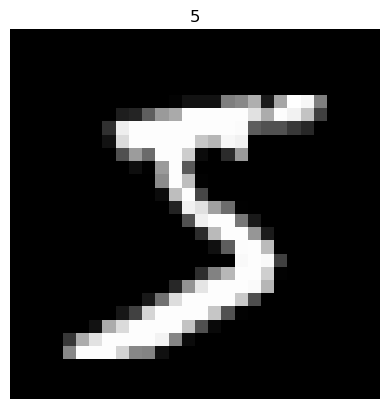

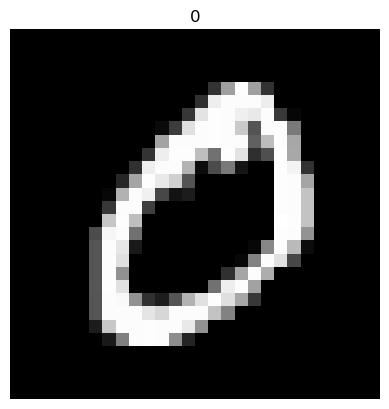

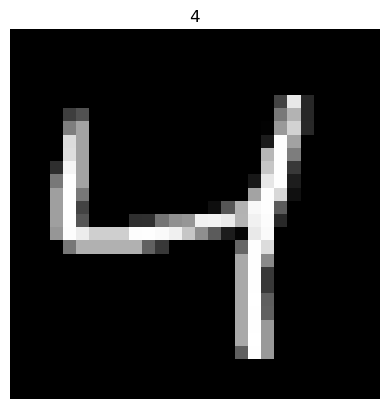

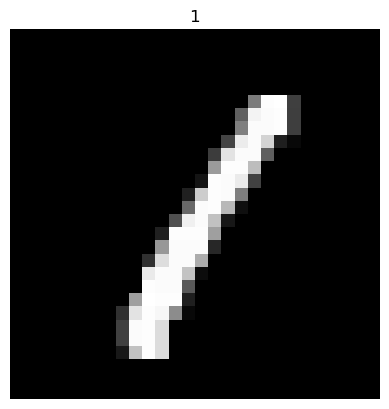

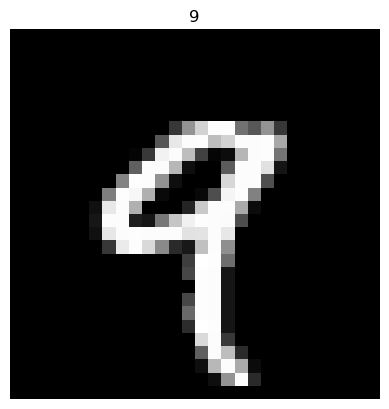

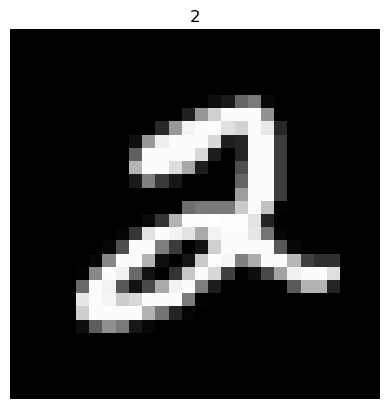

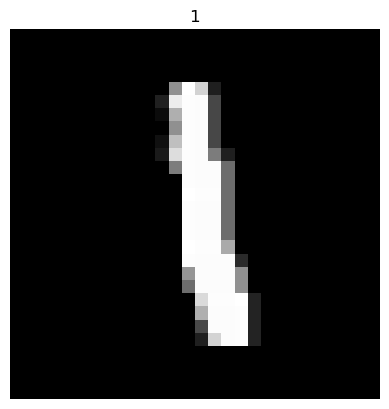

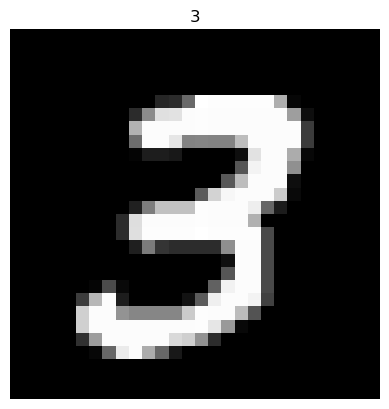

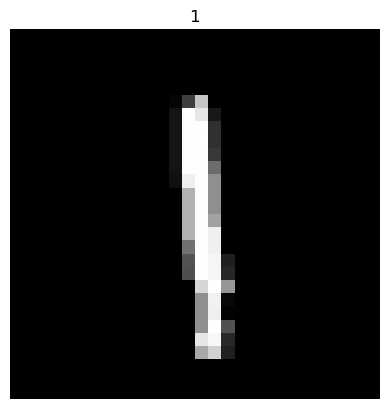

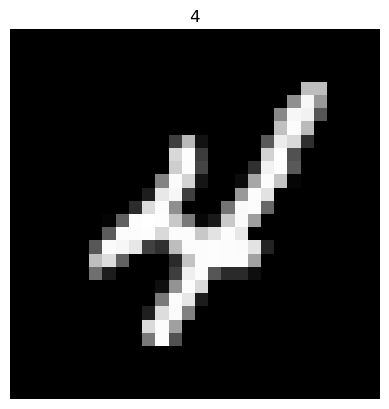

In [4]:
def plot_input_img(i):

    plt.imshow(X_train[i], cmap = "gray")
    plt.title(y_train[i])
    plt.axis("off")
    plt.show()

for i in range(10):
    plot_input_img(i)

In [5]:
#Preprocess the images

X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

X_train  = np.expand_dims(X_train, -1)
X_test  = np.expand_dims(X_test, -1)



In [6]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [8]:
model  = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation = "relu"))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(32, (3, 3),  activation = "relu"))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dropout(0.25))

model.add(Dense(10, activation = "softmax"))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dropout (Dropout)           (None, 800)               0

In [10]:
model.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy, metrics = ['accuracy'])


In [11]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor = 'val_acc', min_delta = .01, patience = 4, verbose = 1)
mc = ModelCheckpoint("./bestmodel.h5", monnitor = "val_acc", verbbose = 1, save_best_only = True)

cb = [es, mc]

In [12]:
his = model.fit(X_train, y_train, epochs = 5, validation_split = .3, callbacks = cb)

Epoch 1/5
1313/1313 [==============================] - 13s 10ms/step - loss: 0.2688 - accuracy: 0.9165 - val_loss: 0.0990 - val_accuracy: 0.9692
Epoch 2/5
  21/1313 [..............................] - ETA: 10s - loss: 0.0942 - accuracy: 0.9717

/Users/aditijain/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1313/1313 [==============================] - 13s 10ms/step - loss: 0.0914 - accuracy: 0.9722 - val_loss: 0.0686 - val_accuracy: 0.9800
Epoch 3/5
1313/1313 [==============================] - 13s 10ms/step - loss: 0.0717 - accuracy: 0.9781 - val_loss: 0.0576 - val_accuracy: 0.9831
Epoch 4/5
1313/1313 [==============================] - 14s 10ms/step - loss: 0.0591 - accuracy: 0.9812 - val_loss: 0.0504 - val_accuracy: 0.9847
Epoch 5/5
1313/1313 [==============================] - 14s 11ms/step - loss: 0.0512 - accuracy: 0.9845 - val_loss: 0.0483 - val_accuracy: 0.9857


In [13]:
model_S = keras.models.load_model("/Users/aditijain/Downloads/Handwritting/bestmodel.h5")

In [15]:
score = model_S.evaluate(X_test, y_test)
print(f"Model accuracy: {score[1]}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0369 - accuracy: 0.9872
Model accuracy: 0.9872000217437744


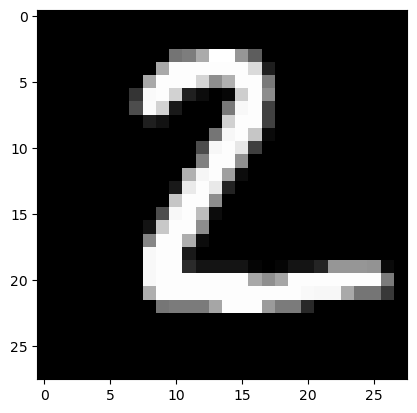

1/1 [==============================] - 0s 15ms/step
2


In [19]:
plt.imshow(X_test[1].reshape(28,28), cmap= 'gray')
plt.show()

image_to_predict = X_test[1].reshape(1, 28, 28, 1)  # Reshape to match the model input shape
prediction = model_S.predict(image_to_predict)
predicted_digit = np.argmax(prediction[0])

print(predicted_digit)